In [1]:
#Lstm mdel for hate speech classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
 
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from wordcloud import WordCloud
 
# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roohaan111/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/roohaan111/nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/roohaan111/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
ids = pd.read_csv('hate-speech-dataset/annotations_metadata.csv')[["file_id", "subforum_id","num_contexts", "label"]]
ids.head()

,file_id,subforum_id,num_contexts,label
0,12834217_1,1346,0,noHate
1,12834217_2,1346,0,noHate
2,12834217_3,1346,0,noHate
3,12834217_4,1346,0,hate
4,12834217_5,1346,0,noHate


In [3]:
def get_data(paths):
  
    sets = []
    for p in paths:

        with open(p) as f:
            file_id = p.split('/')[-1].split('.')[0]
            sets.append((file_id, f.read()))

    return pd.DataFrame(sets, columns=["file_id", "text"])




In [4]:
import glob
df = get_data(glob.glob('./hate-speech-dataset/all_files/*.txt'))

df.head()

,file_id,text
0,13458115_2,It 's like that at most public boards .
1,13367480_1,I wonder if one of the victims opened the door...
2,30422449_1,Some people believe the Jack O ' Lantern also ...
3,14651837_4,Ready .... GO !!!
4,30527903_3,Thanks !


In [5]:
data = df.join(ids.set_index('file_id'), on='file_id')

data.head()

,file_id,text,subforum_id,num_contexts,label
0,13458115_2,It 's like that at most public boards .,1347,0,noHate
1,13367480_1,I wonder if one of the victims opened the door...,1345,0,noHate
2,30422449_1,Some people believe the Jack O ' Lantern also ...,1348,0,noHate
3,14651837_4,Ready .... GO !!!,1371,0,noHate
4,30527903_3,Thanks !,1359,0,noHate


In [6]:
data = data[data.label != 'relation']
data =  data[data.label != 'idk/skip']

In [7]:
X = data.iloc[:, [1,2,3]]
y = data['label']

In [8]:
X.head()

,text,subforum_id,num_contexts
0,It 's like that at most public boards .,1347,0
1,I wonder if one of the victims opened the door...,1345,0
2,Some people believe the Jack O ' Lantern also ...,1348,0
3,Ready .... GO !!!,1371,0
4,Thanks !,1359,0


In [9]:
# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
X['text']= df['text'].apply(lambda x: remove_punctuations(x))
X.head()

,text,subforum_id,num_contexts
0,It s like that at most public boards,1347,0
1,I wonder if one of the victims opened the door...,1345,0
2,Some people believe the Jack O Lantern also r...,1348,0
3,Ready GO,1371,0
4,Thanks,1359,0


In [10]:
#Remove stop words from the text 
#notice, words like is, s and that at etc are removed
def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
 
        if word not in stop_words:
 
            # Let's Lemmatize the word as well
            # before appending to the imp_words list.
 
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)
 
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output

X['text'] = X['text'].apply(lambda text: remove_stopwords(text))
X.head()

,text,subforum_id,num_contexts
0,It like public boards,1347,0
1,I wonder one victims opened door apartment reason,1345,0
2,Some people believe Jack O Lantern also repres...,1348,0
3,Ready GO,1371,0
4,Thanks,1359,0


In [11]:
#make all text lower case
X['text'] = X['text'].str.lower()
X.head()

,text,subforum_id,num_contexts
0,it like public boards,1347,0
1,i wonder one victims opened door apartment reason,1345,0
2,some people believe jack o lantern also repres...,1348,0
3,ready go,1371,0
4,thanks,1359,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [89]:
def get_data(paths, group):
  
    sets = []
    for p in paths:

        with open(p) as f:
            file_id = p.split('/')[-1].split('.')[0]
            sets.append((file_id, f.read(), group))

    return pd.DataFrame(sets, columns=["file_id", "text", "gSet"])

In [90]:
#Read Data from CSV files and combine into one set 
import glob

train_set = get_data(glob.glob('./hate-speech-dataset/sampled_train/*.txt'), 'train')
test_set = get_data(glob.glob('./hate-speech-dataset/sampled_test/*.txt'), 'test')

train_set = train_set.join(ids.set_index('file_id'), on='file_id')
test_set = test_set.join(ids.set_index('file_id'), on='file_id')

comb_set = pd.concat([train_set, test_set]).reset_index(drop=True).drop(['file_id', 'gSet'], axis=1)

In [91]:
comb_set.head()

,text,subforum_id,num_contexts,label
0,Ready .... GO !!!,1371,0,noHate
1,If i sent you some pic wound use be able to pu...,1363,0,noHate
2,ALWAYS SPEAK OUT WHEN IN A CLASS WITH A BRAINW...,1348,0,noHate
3,They fit the same DNA as the DNA found in anci...,1371,0,noHate
4,I would not be surprised if this woman was spe...,1346,2,hate


In [92]:
labels = comb_set['label']
tweets = comb_set['text']
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, stratify=labels, test_size=0.25)


In [93]:
#Reset Indexes 
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_test_stats = X_test.copy()

In [94]:
print("Total training samples:", len(X_train))
print("Total test samples:", len(X_test))

X_train.head()

Total training samples: 1794
Total test samples: 598


0    There are lots of brown and black kids in the ...
1    YouTube - Hail Combat 18 YouTube - Shebeen - F...
2    Chicago Teachers Union president explains how ...
3    I know exactly what you 're saying , I just ha...
4    I 'm not a nig and need a day off to smoke blu...
Name: text, dtype: object

In [95]:
X_train.describe()

count                                                  1794
unique                                                 1786
top       Hell I 'd rather clean a dozen tiolets a day t...
freq                                                      2
Name: text, dtype: object

In [96]:
#Random sample tweet
sample_index = 74
print(X_train.iloc[sample_index])

I stopped there one day looking for a job for my holidays , and I left immediately when I saw it : you can barely find a straight person there in summer .


<AxesSubplot:>

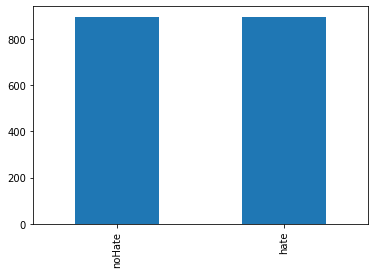

In [97]:
#plot the count of hate tweets vs no hate tweets in the training set
#this is to make sure both classes are balanced in the training and the testing set

y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

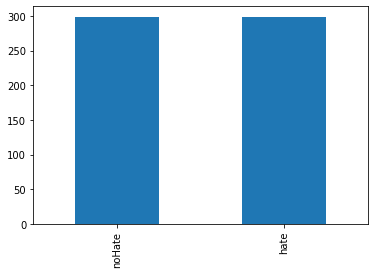

In [98]:
#make sure the classes of hate vs noHate is balanced in the testing set
y_test.value_counts().plot(kind='bar')

In [99]:
# Convert the text feature into a vectors of tokens
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
                             lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


X_train_cv


<1794x5414 sparse matrix of type '<class 'numpy.int64'>'
	with 15426 stored elements in Compressed Sparse Row format>

In [115]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(with_mean = False), SVC(gamma='auto'))
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [124]:
polynomial_svm_clf = Pipeline([
        ("scaler", StandardScaler(with_mean = False)),
        ("svm_clf", SVC(C=5, kernel = "poly", coef0 = 100, degree = 10))
    ])

In [125]:
polynomial_svm_clf.fit(X_train_cv,y_train)
predictions = polynomial_svm_clf.predict(X_test_cv)

In [128]:
# Plot scores and make a confusion matrix for non-hate/hate predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(f'Number of samples to classify: {len(X_test)}\n')
print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
print(f'Confusion matrix: \n{cm}')

Number of samples to classify: 598

Accuracy score: 0.6722408026755853
Confusion matrix: 
[[170 129]
 [ 67 232]]


Text(37.32000000000001, 0.5, 'True label')

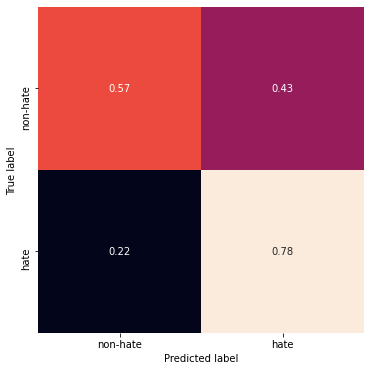

In [127]:
import seaborn as sns
plt.figure(figsize=(6,6))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, square=True, annot=True, cbar=False,
            xticklabels=['non-hate', 'hate'], yticklabels=['non-hate', 'hate'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [138]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# log_reg = LogisticRegression(solver = 'sag', with_mean = False)

In [ ]:
# log_reg.fit(X_train_cv,y_train)

In [137]:
# y_pred = log_reg.predict(X_test)